Este colab fue desarrollado por Arnold Charry Armero.

# Método de Croston

Cuando existen demandas erráticas de ciertos productos pronosticar con los métodos convencionales se vuelve realmente complicado; se maximiza mucho el error. Croston, en 1972, publicó un artículo proponiendo una forma especial de tratar este tipo de demandas (Vidal, 2010). Este método divide en dos el análisis de las series de tiempo. Por un lado, se calcula cada cuánto tiempo habrá demanda y, por otro lado, la cantidad demandada en el momento que vuelvan a haber clientes. Todo lo anterior se ve reflejado en los condicionales y en las siguientes ecuaciones matemáticas:

$$ \mathrm{si} \: x_{t} > 0 \left\{\begin{matrix}
\hat{n}_{t} = \alpha n_{t} + (1 - \alpha) \hat{n}_{t - 1}\\
\hat{z}_{t} = \alpha x_{t} + (1 - \alpha) \hat{z}_{t - 1}\\
x_{t+1} = \frac{\hat{z}_{t}}{\hat{n}_{t}}
\end{matrix}\right. $$

$$ \mathrm{si} \: x_{t} = 0 \left\{\begin{matrix}
\hat{n}_{t} = \hat{n}_{t - 1} \\
\hat{z}_{t} = \hat{z}_{t - 1}\\
x_{t+1} = x_{t}
\end{matrix}\right. $$

donde,

$x_{t} = \mathrm{Demanda \: Observada \: en \: el \: periodo \:} t$

$y_{t} = \mathrm{Variable \: binaria \: igual \: a \: 1 \: si \: ocurre \: una \: demanda \: mayor \: que \: cero \: en \: el \: periodo \:} t \mathrm{\:;igual \: a \: cero, \: de \: lo \: contrario} $

$z_{t} = x_{t} \times y_{t} = \mathrm{Tamaño \: de \: la \: demanda \: ocurrida \: en \: el \: periodo \:} t$

$n_{t} = \mathrm{Numero \: de \: periodos \: transcurridos \: desde \: la \: ultima \: demanda \: mayor \: que \: cero, \: hasta \: el \: periodo \:} t$

$\hat{n}_{t} = \mathrm{Valor \: estimado \: de \: n \: al \ final \: del \: periodo \:} t$

$\hat{z}_{t} = \mathrm{Valor \: estimado \: de \: z \: al \ final \: del \: periodo \:} t$

Ahora se continua con la implementación en código.

In [1]:
#Se importan las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Se ingresa la base de datos
df = pd.read_excel("/content/drive/MyDrive/Operations I/Datos Croston.xlsx")
df.head(50)

,Semana,Demanda
0,1,50
1,2,0
2,3,0
3,4,65
4,5,5
5,6,22
6,7,0
7,8,0
8,9,0
9,10,62


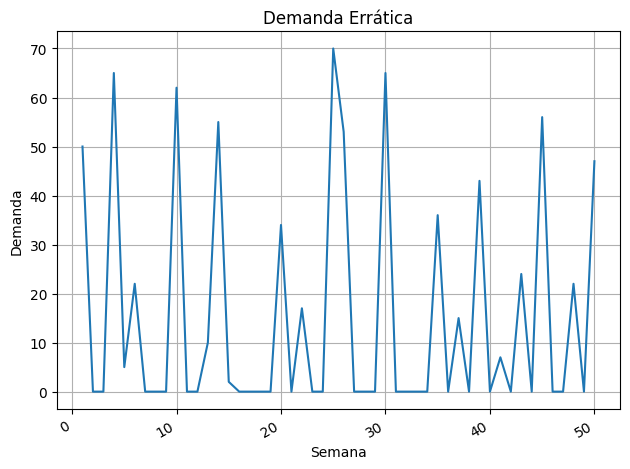

In [4]:
#Se realiza el gráfico de los datos
plt.plot(df.iloc[:, 0], df.iloc[:, 1])
plt.gcf().autofmt_xdate()

plt.title("Demanda Errática")
plt.xlabel("Semana")
plt.ylabel("Demanda")

plt.grid()
plt.tight_layout()
plt.show()

In [5]:
# Se corrobora que es una demanda errática con el CVD
cvd = np.std(df.iloc[:, 1], ddof = 1) / np.mean(df.iloc[:, 1])
print("CVD:", cvd)
if cvd >= 1:
  print("Según el coeficiente de variación, la demanda es errática")
else:
  print("Según el coeficiente de variación, la demanda no es errática.")
  print("Su grado de aleatoriedad es de aproximadamente 0.12. Por lo tanto, se asume como estable y poco aleatoria.")

CVD: 1.5113179398507126
Según el coeficiente de variación, la demanda es errática


## Pronósticos con el Método Croston

### Método Croston

Utilizando el conocimiento adquirido en Pensamiento Algorítmico, es posible crear una función con bucles y condicionales para pronosticar usando el Método de Croston a una columna de datos.

In [6]:
#Se realiza el código del Método de Crostón manualmente

def Metodo_Croston(alpha, training_data = 20):
  """
  Cálcula los pronósticos con el Método Croston
  tomando en cuenta la demanda errática

  Args:
    alpha: Constante de suavización.
    training_datos: Entero que muestra la
    cantidad de datos que toma como de
    entrenamiento.

  Returns:
    Croston_forecast: Lista con pronósticos
    del Método Croston.
  """

  if alpha >= 0 and alpha <= 1:
    n01 = []
    n02 = []
    cont_initial = 0
    value = 1

    for i in range(training_data):
      if df.iloc[i, 1] > 0:
        value = 1
        n01.append(value)
      else:
        value += 1
        n01.append(value)

    for i in range(training_data):
      cont_initial += 1
      if i == 0:
        n02.append(np.nan)
        cont_initial -= 1
      elif df.iloc[i, 1] > 0:
        n02.append(cont_initial)
        cont_initial = 0
      else:
        n02.append(0)


    Sum_n02 = 0
    cont_n02 = 0

    for i in range(1, len(n02)):
      if n02[i] > 0:
        Sum_n02 += n02[i]
        cont_n02 += 1

    n_initial = Sum_n02 / cont_n02

    Sum_z02 = 0
    cont_z02 = 0
    for i in range(training_data):
      if df.iloc[i, 1] > 0:
        Sum_z02 += df.iloc[i, 1]
        cont_z02 += 1

    z_initial = Sum_z02 / cont_z02

    nt = []
    zt = []
    cont_t = []
    cont = 0

    for i in range(training_data, len(df.iloc[:, 1])):
      if i == training_data:
        cont += 1
        cont_t.append(cont)
      else:
        if df.iloc[i - 1, 1] > 0:
          cont = 1
          cont_t.append(cont)
        else:
          cont += 1
          cont_t.append(cont)

    for i in range(len(df.iloc[:, 1]) - training_data):
      if i == 0:
        if df.iloc[i + training_data, 1] > 0:
          value_n = alpha * cont_t[i] + (1 - alpha) * n_initial
          nt.append(value_n)
        else:
          value_n = n_initial
          nt.append(value_n)
      else:
        if df.iloc[i + training_data, 1] > 0:
          value_n = alpha * cont_t[i] + (1 - alpha) * nt[i - 1]
          nt.append(value_n)
        else:
          value_n = nt[i - 1]
          nt.append(value_n)

    for i in range(len(df.iloc[:, 1]) - training_data):
      if i == 0:
        if df.iloc[i + training_data, 1] > 0:
          value_z = alpha * df.iloc[i + training_data, 1] + (1 - alpha) * z_initial
          zt.append(value_z)
        else:
          value_z = z_initial
          zt.append(value_z)
      else:
        if df.iloc[i + training_data, 1] > 0:
          value_z = alpha * df.iloc[i + training_data, 1] + (1 - alpha) * zt[i - 1]
          zt.append(value_z)
        else:
          value_z = zt[i - 1]
          zt.append(value_z)

    Croston_forecast = []

    for i in range(len(df.iloc[:, 1])):
      if i < training_data:
        Croston_forecast.append(np.nan)
      elif i == training_data:
        first_forecast = z_initial / n_initial
        Croston_forecast.append(first_forecast)
      else:
        forecast_value = zt[i - 1 - training_data] / nt[i - 1 - training_data]
        Croston_forecast.append(forecast_value)

    return Croston_forecast


  else:
    print("No has introducido un valor para el párametro alpha entre 0 y 1.")


In [7]:
#Si la constante de suavización no está entre 0 y 1.
Metodo_Croston(2, 20)

No has introducido un valor para el párametro alpha entre 0 y 1.


In [8]:
df.insert(loc = 2, column = "Método Croston (OPI Función)", value = Metodo_Croston(0.01, 20))
df

,Semana,Demanda,Método Croston (OPI Función)
0,1,50,NaN
1,2,0,NaN
2,3,0,NaN
3,4,65,NaN
4,5,5,NaN
5,6,22,NaN
6,7,0,NaN
7,8,0,NaN
8,9,0,NaN
9,10,62,NaN


### Errores de Pronóstico

Para tener los errores, se comparan los valores reales de demanda con los valores pronosticados. De tal forma que se modela matemáticamente como,

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix} $$

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
D_{t} - F_{t}
\end{vmatrix} $$

In [9]:
# Se calculan los errores

def Errores(number_column, forecast_column):
  """
  Calcula los errores tomando en cuenta los n valores anteriores

  Args:
    number_column: Número de la columna seleccionada del dataframe.
    forecast_column: Número de la columna en la que se hizo el pronóstico.
  Returns:
    Errors: lista con los errores de los respectivos pronósticos.
  """

  Errors = []
  l = len(df.iloc[:, number_column])

  for i in range(l):
    Error = np.abs(df.iloc[i, number_column] - df.iloc[i, forecast_column])
    Errors.append(Error)

  return Errors

In [10]:
df.insert(loc = 3, column = "Errores (OPI Función)", value = Errores(1, 2))
df

,Semana,Demanda,Método Croston (OPI Función),Errores (OPI Función)
0,1,50,NaN,NaN
1,2,0,NaN,NaN
2,3,0,NaN,NaN
3,4,65,NaN,NaN
4,5,5,NaN,NaN
5,6,22,NaN,NaN
6,7,0,NaN,NaN
7,8,0,NaN,NaN
8,9,0,NaN,NaN
9,10,62,NaN,NaN


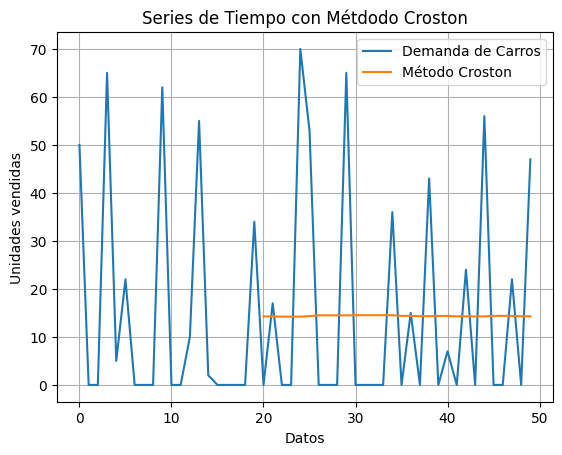

In [11]:
#Graficamos varios de los resultados
plt.plot(df.iloc[:, 1], label = 'Demanda de Carros')
plt.plot(df.iloc[:, 2], label = 'Método Croston')
plt.grid()
plt.legend(loc = 'best')
plt.title('Series de Tiempo con Métdodo Croston')
plt.xlabel("Datos")
plt.ylabel("Unidades vendidas")
plt.show()

### MAD

Una medida muy importante utilizada para medir el error global de un tipo de pronóstico es el MAD, el cual es el promedio de los errores. Matemáticamente se define así:

$$ \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

In [12]:
#Parámetros necesarios para la optimización
training_data = 20

In [13]:
def MAD_Croston(alpha):

  """
  Calcula el MAD del Método Croston tomando
  en cuenta el alpha ingresado.

  Args:
    alpha: Constante de suavización

  Returns:
    mad: Número float con la desviación absoluta media (MAD).
  """

  n01 = []
  n02 = []
  cont_initial = 0
  value = 1

  for i in range(training_data):
    if df.iloc[i, 1] > 0:
      value = 1
      n01.append(value)
    else:
      value += 1
      n01.append(value)

  for i in range(training_data):
    cont_initial += 1
    if i == 0:
      n02.append(np.nan)
      cont_initial -= 1
    elif df.iloc[i, 1] > 0:
      n02.append(cont_initial)
      cont_initial = 0
    else:
      n02.append(0)


  Sum_n02 = 0
  cont_n02 = 0

  for i in range(1, len(n02)):
    if n02[i] > 0:
      Sum_n02 += n02[i]
      cont_n02 += 1

  n_initial = Sum_n02 / cont_n02

  Sum_z02 = 0
  cont_z02 = 0
  for i in range(training_data):
    if df.iloc[i, 1] > 0:
      Sum_z02 += df.iloc[i, 1]
      cont_z02 += 1

  z_initial = Sum_z02 / cont_z02

  nt = []
  zt = []
  cont_t = []
  cont = 0

  for i in range(training_data, len(df.iloc[:, 1])):
    if i == training_data:
      cont += 1
      cont_t.append(cont)
    else:
      if df.iloc[i - 1, 1] > 0:
        cont = 1
        cont_t.append(cont)
      else:
        cont += 1
        cont_t.append(cont)

  for i in range(len(df.iloc[:, 1]) - training_data):
    if i == 0:
      if df.iloc[i + training_data, 1] > 0:
        value_n = alpha * cont_t[i] + (1 - alpha) * n_initial
        nt.append(value_n)
      else:
        value_n = n_initial
        nt.append(value_n)
    else:
      if df.iloc[i + training_data, 1] > 0:
        value_n = alpha * cont_t[i] + (1 - alpha) * nt[i - 1]
        nt.append(value_n)
      else:
        value_n = nt[i - 1]
        nt.append(value_n)

  for i in range(len(df.iloc[:, 1]) - training_data):
    if i == 0:
      if df.iloc[i + training_data, 1] > 0:
        value_z = alpha * df.iloc[i + training_data, 1] + (1 - alpha) * z_initial
        zt.append(value_z)
      else:
        value_z = z_initial
        zt.append(value_z)
    else:
      if df.iloc[i + training_data, 1] > 0:
        value_z = alpha * df.iloc[i + training_data, 1] + (1 - alpha) * zt[i - 1]
        zt.append(value_z)
      else:
        value_z = zt[i - 1]
        zt.append(value_z)

  Croston_forecast = []

  for i in range(len(df.iloc[:, 1])):
    if i < training_data:
      Croston_forecast.append(np.nan)
    elif i == training_data:
      first_forecast = z_initial / n_initial
      Croston_forecast.append(first_forecast)
    else:
      forecast_value = zt[i - 1 - training_data] / nt[i - 1 - training_data]
      Croston_forecast.append(forecast_value)


  Errors = []
  Sum = 0

  for i in range(training_data, len(Croston_forecast)):
    Error = np.abs(df.iloc[i, 1] - Croston_forecast[i])
    Errors.append(Error)

  for i in range(len(Errors)):
    Sum += Errors[i]

  mad = Sum / (df.shape[0] - training_data)

  return mad

In [14]:
MAD_Croston(0.01)

18.553634078913905

### Optimización del Alpha

Ahora bien, haciéndo uso de los conocimientos de Analítica I y Matemáticas Aplicadas I, se puede minimizar la función objetivo MAD para obtener el mínimo error.

$ \mathbf{f.o.} $
$$ \mathit{min} \: \: \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

$ \mathbf{s.a.} $
$$0 \leq \alpha \leq 1$$

donde,

$ \alpha = \mathrm{Constante \: de \: Suavizacion}$

In [15]:
#Realizando la optimización

from scipy import optimize

initial_alpha = 0.01

def c1(X):
  alpha = X
  return alpha
def c2(X):
  alpha = X
  return -(alpha - 1.0)
def c3(X):
    'positivity constraint'
    return X[0]

bnds = [(0.0, 1.0)]

result = optimize.minimize(MAD_Croston, initial_alpha, constraints = [{'type':'ineq','fun':f} for f in [c1,c2,c3]], bounds = bnds, method = 'SLSQP')

In [16]:
#Alpha óptimo
result.x[0]

1.1015494072452725e-15

In [17]:
#MAD resultante
Optimized_MAD = result.fun
print(Optimized_MAD)

18.50506822612086


### Referencias


*   Vidal, J. (2010). Fundamentos de control y gestión de inventarios. https://doi.org/10.25100/peu.48
*   Laura Muñoz. (2021, September 20). Metodo Croston [Video]. YouTube. https://www.youtube.com/watch?v=MGcNh_lEJ-k
*   Talele, J. (2021, December 13). Croston model : Forecasting Intermittent demand data (Time Series analysis). Medium. https://juileetalele.medium.com/croston-model-forecasting-intermittent-demand-data-time-series-analysis-6f3a2bb1654b
* Vandeput, N. (2023, September 27). Croston forecast model for intermittent demand | Towards Data Science. Medium. https://towardsdatascience.com/croston-forecast-model-for-intermittent-demand-360287a17f5f